In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='x-large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
matplotlib.rc('font', **font)

In [3]:
cosmo = []
cosmo.append(Class())
cosmo[-1].set({'omega_b':0.022,'omega_cdm':0.0})
cosmo.append(Class())
cosmo[-1].set({'omega_b':0.022,'omega_cdm':0.125})

for cosm in cosmo:
    cosm.set({'YHe':0.25,'output':'tCl','gauge':'Newtonian'})
    cosm.compute()

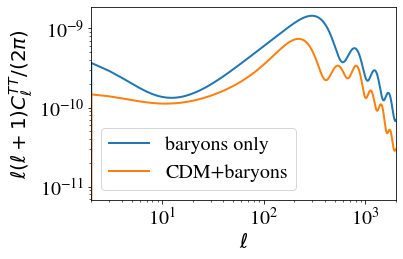

In [5]:
for i in range(len(cosmo)):
    cosm = cosmo[i]
    cl = cosm.raw_cl()
    l = cl['ell']
    plt.loglog(l,cl['tt']*l*(l+1)/(2*np.pi),lw=2)
plt.legend(['baryons only','CDM+baryons'],loc='lower left')
plt.xlim([2,2e3])
#plt.ylim([1e-11,2e-9])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1) C_\ell^{TT} /(2\pi)$')
plt.tight_layout()
plt.savefig('cdm_exist.pdf',bbox='tight')

0.675182
{'Omega_Lambda': 0.6885894908820461}
0.7553126
{'Omega_Lambda': 0.838881348787601}
0.9334778
{'Omega_Lambda': 0.9412687003059131}


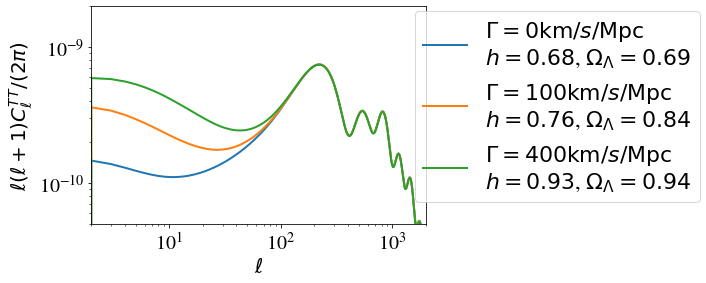

In [7]:
cosmo = []
cosmo.append(Class())
cosmo[-1].set({'Gamma_dcdm':0.0})
cosmo.append(Class())
cosmo[-1].set({'Gamma_dcdm':100.0})
cosmo.append(Class())
cosmo[-1].set({'Gamma_dcdm':400.0})
#cosmo.append(Class())
#cosmo[-1].set({'omega_b':0.022,'omega_cdm':0.0,'Omega_k':-0.04,'A_s':2e-9,'N_ur':0.0})

for cosm in cosmo:
    #cosm.set({'omega_b':0.02216,'omega_ini_dcdm':0.119,'n_s':0.963,'A_s':2.43e-9,'gauge':'Newtonian','h':0.677,
    #         'output':'tCl, mPk','P_k_max_1/Mpc':1.0})
    cosm.set({'omega_b':0.02222,'omega_ini_dcdm':0.1197,'n_s':0.9655,'A_s':2.1955e-9,'gauge':'Synchronous',
              '100*theta_s':1.04085,'omega_cdm':1e-6,
             'output':'tCl, mPk','P_k_max_1/Mpc':1.0,'background_verbose':1})
    cosm.compute()

hvec = []
lambdavec = []
gammavec = [0,100,400]
for i in range(len(cosmo)):
    cosm = cosmo[i]
    cl = cosm.raw_cl()
    l = cl['ell']
    plt.loglog(l,cl['tt']*l*(l+1)/(2*np.pi),lw=2)
    print(cosm.h())
    derdict = cosm.get_current_derived_parameters(['Omega_Lambda'])
    print(derdict)
    lambdavec.append(derdict['Omega_Lambda'])
    hvec.append(cosm.h())
lgd = plt.legend([r'$\Gamma='+str(gammavec[i])+r'\mathrm{km}/s/\mathrm{Mpc}$'+
            '\n' '$h='+"{:10.2f}".format(hvec[i])+'$' ', ' '$\Omega_\Lambda='+"{:10.2f}".format(lambdavec[i])+'$'
            for i in range(len(gammavec))],
           fontsize=22,bbox_to_anchor=(1.85, 1.03))
plt.xlim([2,2e3])
plt.ylim([5e-11,2e-9])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1) C_\ell^{TT} /(2\pi)$')
#plt.tight_layout()
plt.savefig('decay_cl.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

0.8415555569831538
0.7432838424955428
0.6115434805335723


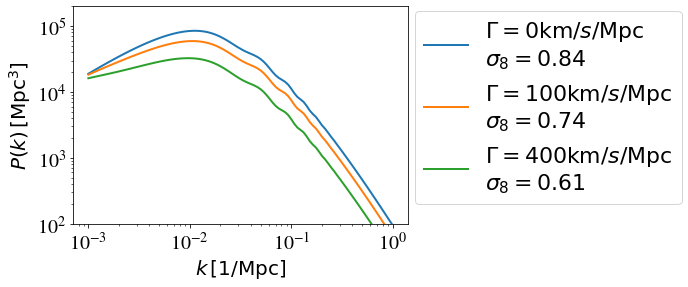

In [8]:
k = np.logspace(-3,0,100)
sigmavec = []
for i in range(len(cosmo)):
    cosm = cosmo[i]
    h = cosm.h()
    pkvec = [cosm.pk(kk,0.0) for kk in k]
    plt.loglog(k,pkvec,lw=2)
    print(cosm.sigma8())
    sigmavec.append(cosm.sigma8())
lgd = plt.legend([r'$\Gamma='+str(gammavec[i])+r'\mathrm{km}/s/\mathrm{Mpc}$'+
            '\n' '$\sigma_8='+"{:10.2f}".format(sigmavec[i])+'$'
            for i in range(len(gammavec))],
           fontsize=22,bbox_to_anchor=(1.85, 1.03))
#plt.xlim([2,2e3])
plt.ylim([1e2,2e5])
plt.xlabel(r'$k\,[1/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)\,[\mathrm{Mpc}^{3}]$')
#plt.tight_layout()
plt.savefig('decay_pk.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

0.6751856
{'Omega_Lambda': 0.6885951588037643}
0.7421391
{'Omega_Lambda': 0.7732787252631338}
0.8416137
{'Omega_Lambda': 0.827070908802613}


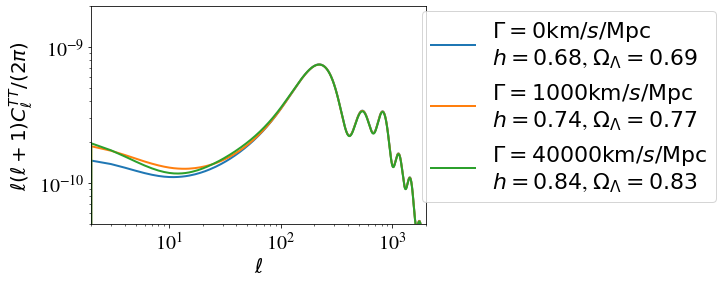

In [9]:
cosmo = []
cosmo.append(Class())
cosmo[-1].set({'Gamma_dcdm':0.0})
cosmo.append(Class())
cosmo[-1].set({'Gamma_dcdm':1000.0})
cosmo.append(Class())
cosmo[-1].set({'Gamma_dcdm':40000.0})
#cosmo.append(Class())
#cosmo[-1].set({'omega_b':0.022,'omega_cdm':0.0,'Omega_k':-0.04,'A_s':2e-9,'N_ur':0.0})

for cosm in cosmo:
    #cosm.set({'omega_b':0.02216,'omega_ini_dcdm':0.119,'n_s':0.963,'A_s':2.43e-9,'gauge':'Newtonian','h':0.677,
    #         'output':'tCl, mPk','P_k_max_1/Mpc':1.0})
    cosm.set({'omega_b':0.02222,'omega_ini_dcdm':0.0197,'n_s':0.9655,'A_s':2.1955e-9,'gauge':'Synchronous',
              '100*theta_s':1.04085,'omega_cdm':0.10,
             'output':'tCl, mPk','P_k_max_1/Mpc':1.0,'background_verbose':1})
    cosm.compute()

hvec = []
lambdavec = []
gammavec = [0,1000,40000]
for i in range(len(cosmo)):
    cosm = cosmo[i]
    cl = cosm.raw_cl()
    l = cl['ell']
    plt.loglog(l,cl['tt']*l*(l+1)/(2*np.pi),lw=2)
    print(cosm.h())
    derdict = cosm.get_current_derived_parameters(['Omega_Lambda'])
    print(derdict)
    lambdavec.append(derdict['Omega_Lambda'])
    hvec.append(cosm.h())
lgd = plt.legend([r'$\Gamma='+str(gammavec[i])+r'\mathrm{km}/s/\mathrm{Mpc}$'+
            '\n' '$h='+"{:10.2f}".format(hvec[i])+'$' ', ' '$\Omega_\Lambda='+"{:10.2f}".format(lambdavec[i])+'$'
            for i in range(len(gammavec))],
           fontsize=22,bbox_to_anchor=(1.9, 1.03))
plt.xlim([2,2e3])
plt.ylim([5e-11,2e-9])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1) C_\ell^{TT} /(2\pi)$')
#plt.tight_layout()
plt.savefig('decay_cl2.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

0.8415526112644894
0.8014132852713257
0.7946271367370417


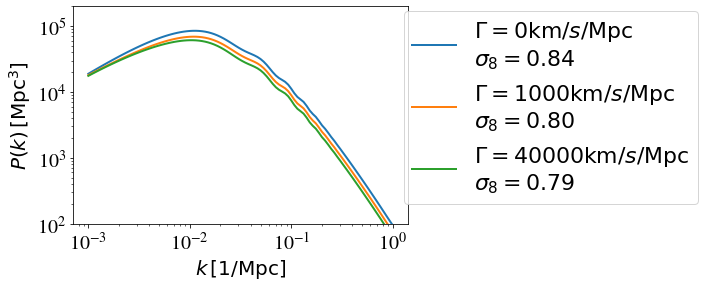

In [11]:
k = np.logspace(-3,0,100)
sigmavec = []
for i in range(len(cosmo)):
    cosm = cosmo[i]
    h = cosm.h()
    pkvec = [cosm.pk(kk,0.0) for kk in k]
    plt.loglog(k,pkvec,lw=2)
    print(cosm.sigma8())
    sigmavec.append(cosm.sigma8())
lgd = plt.legend([r'$\Gamma='+str(gammavec[i])+r'\mathrm{km}/s/\mathrm{Mpc}$'+
            '\n' '$\sigma_8='+"{:10.2f}".format(sigmavec[i])+'$'
            for i in range(len(gammavec))],
           fontsize=22,bbox_to_anchor=(1.9, 1.03))
#plt.xlim([2,2e3])
plt.ylim([1e2,2e5])
plt.xlabel(r'$k\,[1/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)\,[\mathrm{Mpc}^{3}]$')
#plt.tight_layout()
plt.savefig('decay_pk2.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')